<a href="https://colab.research.google.com/github/dylanwalker/BA865/blob/master/BA865_Lecture_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Preface

In [0]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pytorch

![](https://drive.google.com/uc?id=1OFx-0HlKzV2kOVaD2SNkZwOUpHhClMiJ)

## What is PyTorch?

Pytorch is an open source machine learning framework that we can use to build and train artificial neural networks.


## Why PyTorch?

You might have heard about a very popular Neural Network library called Tensorflow. And you might be wondering "Why aren't we learning Tensorflow?".

There are a few answers to this question:
- Declarative vs Imperative:
 - Tensorflow was designed to be **declarative**. In Tensorflow, you set up your neural network architecture as a static graph before a model can run. The graph is full of all of these placeholders that will be replaced with tensors built from data when the model is run.  In this sense, the model is kind of an enclosed box that you define ahead of time, with only a few ways that you can communicate or pass data into this box. 
 - In contrast, PyTorch is **imperative**. You can define, change and pass data through nodes of the graph as you go. This means you have the ability to change things on the fly and peer into what is happening, and even **debug** easily.
- Static vs Dynamic:
 - Because you build static graphs in Tensorflow, it is harder to implement dynamic neural network architectures. Other dynamical things, such as input data that has varying size have to be handled with workarounds (such as padding the data).
 - But PyTorch is naturally dynamic and so its relatively easy to do these things.
- Pedagogical reasons:
 - The Tensorflow API is a bit cluttered. There are many ways to do things and it isn't always clear what is the best way to do it. While there is a ton of support online (because the community of Tensorflow users is quite large), it has evolved significantly over the years and you may easily find outdated methods and approaches.
 - PyTorch is very easy to learn and is more "Pythonic".


To be clear, there are lots of other differences and Tensorflow has some advantages. Not to mention that Tensorflow has a new Eager execution framework that allows you to do more dynamic things with it. Its also very easy to deploy in production and can be computationally efficient. Ultimately if you continue to learn and work with neural networks, you will likely have to learn both frameworks. However, I chose PyTorch as a starting framework because I believe it provides a smoother learning curve.  And once you know PyTorch and the fundamentals of neural networks, it will be much easier to learn Tensorflow if you choose. Typically, researchers who are working on creating new and interesting neural network architectures prefer to work in PyTorch.


## What does PyTorch do for us?

One of the many thing that pytorch provides is the ability to make and work with tensor objects.

A tensor is a number, vector, matrix, or any n-dimensional array.  You might be thinking "Hey, wait a minute, we already have a library for working with numbers, vectors, matrices and n-dimensional arrays -- its called numpy!".


That's true, but pytorch is different because the tensor objects are built to automatically compute gradients (derivatives) when they are linked to one another through an expression. Computing gradients is an important aspect of the backward propagation step that is used in the training loop to train a neural network.

We will see how all of this works together, but for now let's just explore how to create and work with some very basic tensors.

# Basics of Pytorch tensors

The first thing we need to do is to import the pytorch module and decide whether we want to execute our code on a CPU (Central Processing Unit) or a GPU (Graphics Processing Unit).

The operations involved in working with tensors and training neural network can benefit from parellelization significantly. Just as tools such as numpy take advantage of linear algebra libraries to vectorize operations, pytorch can also take advantage of libraries to parallelize computations. Whereas modern CPUs have increased the number of cores over the years, they still pale in comparison to the number of cores on GPUs which can number in the hundreds to thousands. Neural networking frameworks such as Pytorch can leverage libraries, such as CUDA (a parallelel computing framework developed by NVIDIA) to take advantage of all the GPU cores.

Of course, in order to do this, we need to be executing the code on a machine that has a GPU.

Google Colab offers GPUs and TPUs (Tensor Processing Units) as options under the runtime settings: 
`Runtime->Change Runtime Type->Hardware Accelerator-> GPU or TPU`. 

Let's do this now, so that we have access to a GPU.

We won't need to do this for now, as we'll be executing relatively shallow neural nets that can still be trained in a reasonable amount of time with just a CPU.


When you work with pytorch, you can specify whether to use the CPU or GPU (if one is available). So I will show you code to do this.

NOTE: When first building networks, its often better to work on the CPU, as debugging is much easier. Converting your tensors and model to run on the GPU is relatively easy and can be done at the last step when you want to train it over many epochs (iterations over the data).


In [90]:
import torch
torch.cuda.is_available() # This will return True if we have  setup a GPU on this Colab runtime or False otherwise

True

Now let's see how to make some simple tensors. It is very similar to how you create multi-dimensional arrays in numpy:

In [91]:
x = torch.tensor([[0.,3.0,-3.4],[-2.4,8.0,5.9]]) # A 2x2 tensor of floats
x

tensor([[ 0.0000,  3.0000, -3.4000],
        [-2.4000,  8.0000,  5.9000]])

In [92]:
x.shape

torch.Size([2, 3])

In [93]:
x.dtype

torch.float32

In [94]:
torch.zeros(2,2) # a 2x2 tensor with all values set to 0

tensor([[0., 0.],
        [0., 0.]])

In [95]:
torch.rand(1) # a 1-D tensor (scalar) filled with random values.

tensor([0.8657])

You can do all the things with tensors that you can do with numpy, such as the usual arithmetic operations:

In [96]:
x=torch.ones(3,5)
y=torch.rand(3,5)
print(x)
print(y)
print(x+y)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0.3479, 0.3558, 0.7294, 0.8832, 0.8705],
        [0.6144, 0.2332, 0.9167, 0.6948, 0.2817],
        [0.0358, 0.7607, 0.4440, 0.2389, 0.3487]])
tensor([[1.3479, 1.3558, 1.7294, 1.8832, 1.8705],
        [1.6144, 1.2332, 1.9167, 1.6948, 1.2817],
        [1.0358, 1.7607, 1.4440, 1.2389, 1.3487]])


In [97]:
y/x

tensor([[0.3479, 0.3558, 0.7294, 0.8832, 0.8705],
        [0.6144, 0.2332, 0.9167, 0.6948, 0.2817],
        [0.0358, 0.7607, 0.4440, 0.2389, 0.3487]])

And tensors in torch have their own version of Ufuncs and support broadcasting (just like numpy):

In [98]:
y+1 # will add 1 to every element of y

tensor([[1.3479, 1.3558, 1.7294, 1.8832, 1.8705],
        [1.6144, 1.2332, 1.9167, 1.6948, 1.2817],
        [1.0358, 1.7607, 1.4440, 1.2389, 1.3487]])

Tensors can live in the main memory of the machine (if we are going to work with them on the CPU) or they can live in the graphics cards dedicated memory (if we are going to work with them on the GPU):

In [99]:
some_cpu_tensor=torch.rand(5,4)
some_cpu_tensor.device

device(type='cpu')

In [100]:
some_gpu_tensor=torch.cuda.FloatTensor(5,4).uniform_() # notice the call to do this on the GPU is a bit different
some_gpu_tensor

tensor([[0.3990, 0.5167, 0.0249, 0.9401],
        [0.9459, 0.7967, 0.4150, 0.8203],
        [0.2290, 0.9096, 0.1183, 0.0752],
        [0.4092, 0.9601, 0.2093, 0.1940],
        [0.8909, 0.4387, 0.3570, 0.5454]], device='cuda:0')

Notice the property `device` indicates `cuda` (i.e., that it lives on the GPU)

We can also move a tensor to the GPU or CPU:

In [101]:
some_cpu_tensor.to("cuda") # This will return a tensor that is identical to the one we created earlier, but that lives in the memory on the GPU

tensor([[0.9933, 0.1010, 0.5539, 0.1753],
        [0.4220, 0.6152, 0.9305, 0.0164],
        [0.9500, 0.1299, 0.1202, 0.7880],
        [0.8342, 0.0387, 0.7423, 0.3467],
        [0.3327, 0.6782, 0.7148, 0.6039]], device='cuda:0')

In [102]:
some_gpu_tensor.to("cpu") # This will return a tensor that is identical to the one we created earlier, but the lives in the memory on the CPU

tensor([[0.3990, 0.5167, 0.0249, 0.9401],
        [0.9459, 0.7967, 0.4150, 0.8203],
        [0.2290, 0.9096, 0.1183, 0.0752],
        [0.4092, 0.9601, 0.2093, 0.1940],
        [0.8909, 0.4387, 0.3570, 0.5454]])

Note that the above calls return copies of the tensor that live in the memory of either the CPU or GPU, but they do not affect the original tensor we created. If we want to work with that copy we have to assign it to a variable. 

In [103]:
some_cpu_tensor

tensor([[0.9933, 0.1010, 0.5539, 0.1753],
        [0.4220, 0.6152, 0.9305, 0.0164],
        [0.9500, 0.1299, 0.1202, 0.7880],
        [0.8342, 0.0387, 0.7423, 0.3467],
        [0.3327, 0.6782, 0.7148, 0.6039]])

`some_cpu_tensor` still lives in the CPU.

In [104]:
another_gpu_tensor = some_cpu_tensor.to("cuda")
another_gpu_tensor

tensor([[0.9933, 0.1010, 0.5539, 0.1753],
        [0.4220, 0.6152, 0.9305, 0.0164],
        [0.9500, 0.1299, 0.1202, 0.7880],
        [0.8342, 0.0387, 0.7423, 0.3467],
        [0.3327, 0.6782, 0.7148, 0.6039]], device='cuda:0')

Pytorch tensors support all the usual numpy functions. So you should feel right at home working with them. For that reason, I won't go through all the basic things that you can do with tensors. 

For example:

In [105]:
some_gpu_tensor.max()

tensor(0.9601, device='cuda:0')

# Gradients and Autograd

At this point, you might again be wondering why we need pytorch if numpy can do all these things already. But there is one very important thing that pytorch tensors do that is very useful for working with neural networks. They can automatically differentiate -- or in other words, they can calculate gradients (multi-dimensional derivatives) when we combine tensors together with mathematical expressions.  This is exactly what is needed for the "back propagation" step of training a neural net.

When we create a tensor, we can tell pytorch to enable calculation of  gradients for that tensor by specifying the keyword argument `requires_grad=True`.

In [106]:
x=torch.rand(1,requires_grad=True)
x

tensor([0.5376], requires_grad=True)

`requires_grad` is contagious -- any expression that depends on a tensor that requires a gradient will also require a gradient:

In [107]:
y=x**2 # remember ** means "raise to the power"
print(y)
print(y.requires_grad)

tensor([0.2890], grad_fn=<PowBackward0>)
True


Two things to notice:
1. `y` has a function associated with it called `grad_fn`. The name of the functions gives a hint at what it is for `PowBackward0`. The `Pow` indicates that it is from a power operation and `Backward` indicates that it is used to propagate the gradient backward. 
2. Because `y` depends on `x` which requires a gradient, it also requires a gradient (contagious).

Whenever we have a **scalar tensor** (a tensor that holds only one value, not a vector or multi-dimensional array) that depends on other tensors, we can tell pytorch to calculate the gradient. We do this by calling `y.backward()`. The term backward here refers to back propagation and it is the fundamental way that we train a neural network. By "train" I mean, adjust the weights and biases of a NN to minimize the loss function.


In [0]:
y.backward() # tell pytorch to calculate the gradients involved in the definition of y

In [109]:
print(f'dy/dx = {x.grad}')
print(2*x)

dy/dx = tensor([1.0752])
tensor([1.0752], grad_fn=<MulBackward0>)


Notice that pytorch correctly calculated the gradient:  $dy/dx=2x$

How this works is that tensorflow takes expressions between tensors and uses them to build a *computational graph* behind the scenes. All operators in this graph are implemented by the **autograd** package. Pytorch can pass data forward through this graph (i.e., start with the input, perform the operations to get the output) and also propagate things backward through this graph by applying the chain rule (remember your calculus?). Autograd is designed in a modular way so that the functions it implements only have to worry about their own role (their own differentiation with respect to inputs and outputs) in the chain rule process.  

Some important things to note here:
- Automatic differentiation is all handled for us in the background by autograd -- we won't actually need to manually look at `.grad`s
- By default, the `.grad` values accumulate. This is useful for pytorch do "do its thing" when we tell it to backward propagate the loss. But if we wanted to handle some portions of this process manually, we have to remember that gradients will accumulate unless we set them to zero. 
 - We can zero gradients of some tensor `x` with a call to `x.grad.zero_()`
 - we'll actually do this today when we manually implement linear regression.
 - More generally, we might want to zero the gradients of all the tensors in a neural network. We'll talk about this later.



In [110]:
x.grad.zero_()
print(x.grad)

tensor([0.])



 ## How does autograd do it's thing?
 * At this stage, you don't need to know... and you probably don't want to know.
 - Ok, really want to know? Have a [look at this video](https://youtu.be/MswxJw-8PvE) or [this blog post](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/).
 - Autograd is a really clever implementation of automatic differentiation. So, naturally it is not trivial to understand.


# Getting a scalar or a numpy array from a tensor

There are some circumstances where you might want to get the value of a scalar rather than as a tensor type.  You can do this with the `.item()` method:


In [111]:
st = torch.tensor([5.2])
st.item()

5.199999809265137

In some circumstances, we might want to get a tensor as a numpy array.  If we want to do this, we must:
-  use the `.detach()` method to get rid of any gradient part of the tensor and keep only the array part
- then we can use the `.numpy()` method to get the detached tensor as a numpy array

In [112]:
at = torch.rand(10,requires_grad=True)
at.detach().numpy()

array([0.7231209 , 0.7913333 , 0.7681263 , 0.02009606, 0.07203591,
       0.9672291 , 0.6569424 , 0.91139877, 0.2620442 , 0.20310795],
      dtype=float32)

# Linear Regression with Pytorch -- the manual way

Now we will illustrate how pytorch can be used to implement the main training loop in training a neural network: 
- forward computation to get the result and calculate the loss by comparing the result to the "right answer"
- backward propagation to adjust the weights to minimize the loss

We'll do this through a simple example of linear regression.

The data that we'll work with is data on Apple and Orange crop yields from different geographic regions and average data on temperature, rainfall and humidity:

In [113]:
import pandas as pd
crop_file='https://raw.githubusercontent.com/dylanwalker/BA865/master/datasets/crop_yield.csv'
crop_df=pd.read_csv(crop_file)
crop_df

,Region,Temp_F,Rainfall_mm,Humidity_pct,Apples_ton,Oranges_ton
0,Kanto,73,67,43,56,70
1,Johto,91,88,64,81,101
2,Hoenn,87,134,58,119,133
3,Sinnoh,102,43,37,22,37
4,Unova,69,96,70,103,119


In [114]:
inputs=np.array(crop_df.iloc[:,1:4],dtype='float32')
inputs=torch.from_numpy(inputs)
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [115]:
targets=np.array(crop_df.iloc[:,4:],dtype='float32')
targets=torch.from_numpy(targets)
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

We want to make a linear "neural network" that relates the inputs to the targets. In other words we want to implement the equation:


$$
\hspace{1cm} Y\hspace{1cm}=\hspace{1.cm}X \hspace{2.1cm} \times \hspace{1.cm} W^T \hspace{1.cm}  + \hspace{1cm} b \hspace{1cm}
$$

$$
\left[ \begin{array}{cc}
y_{11} & y_{21} \\
y_{12} & y_{22} \\
y_{13} & y_{23} \\
\end{array} \right]
%
=
%
\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

We'll start with some random weights and biases -- this is typically how we "initialize" the parameters of a neural network -- set them to some random values to start:

In [0]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

We'll define our model according to the above equation 

In [0]:
# Define the model
def model(x):
    return x @ w.t() + b  #note that @ is the matrix multiplication operator in numpy or pytorch

We took advantage of broadcasting in the above (since we only have two biases). We also took the transpose of the weight matrix with `.t()` (so that the dimensions match to permit a matrix multiplication). 

Our model is ready to generate predictions -- although, they won't be very good ones yet because we haven't trained it:

In [118]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 31.0969, -35.6690],
        [ 37.4914, -36.8598],
        [ 69.3552, -95.9447],
        [ 19.9002, -20.1102],
        [ 38.8097, -35.2730]], grad_fn=<AddBackward0>)


In [119]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


The next step is to define a loss function, that describes how (poorly) our predictions match the targets. We'll use the mean squared error, since we are implementing linear regression. Different circumstances would require a potentially different loss function.

In [0]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [121]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(11875.1221, grad_fn=<DivBackward0>)


We can now calculate the gradients of the loss with respect to the weights and biases:

In [0]:
# Compute gradients
loss.backward()

In [123]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.0664,  0.6464, -0.3988],
        [-0.1549, -1.1394,  1.2155]], requires_grad=True)
tensor([[ -2947.9243,  -3680.4463,  -2261.1597],
        [-11329.4688, -13431.2031,  -7911.5547]])


In [124]:
# Gradients for bias
print(b)
print(b.grad)

tensor([ 0.0898, -0.2850], requires_grad=True)
tensor([ -36.8693, -136.7713])


We know about derivatives and optimization from calculus:
![](https://drive.google.com/uc?id=1ywzITKPARYGqM8eS_ha7OFbD4g0wF7fg)

if the gradient is positive: 
- increasing the variable will increase the loss 
- decreasing the variable will decrease the loss 

If the gradient is negative:
- increasing the variable will decrease the loss 
- decreasing the variable will increase the loss 


For now, we'll zero the gradients that for our `w` and `b` tensors, as we'll want to start the training process with no gradients accumulated:


In [125]:
w.grad.zero_()
b.grad.zero_()

tensor([0., 0.])

We'll use gradient descent as the rule for adjusting our weights and biases:
```
w -= w.grad * 1e-5
b -= b.grad * 1e-5
```
This is in accordance with the intuition we developed above. We chose to multiply the gradient by a small number (which adjusts how big of a step we take). This is called the "learning rate".

Now we are ready to implement our training loop. We will pass over our data several times to keep adjusting the weights and biases.  Each pass is called an *epoch*:

In [0]:
# Train for 100 epochs
losses=[]
num_epochs = 100
for epoch in range(num_epochs):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad(): # this ensures that gradients won't be affected in the codeblock -- we already have the values of the gradient from the loss.backward() call
        w -= w.grad * 1e-5 
        b -= b.grad * 1e-5
        w.grad.zero_() # zero the weight gradient after we adjusted the weight
        b.grad.zero_() # zero the bias gradient after we adjusted the bias

Ok, let's see how we did:

Text(0, 0.5, 'Loss')

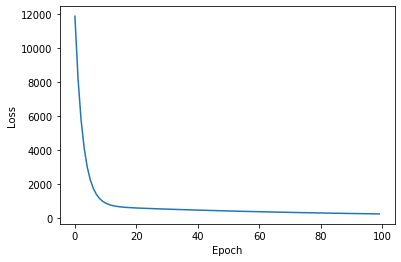

In [127]:
import matplotlib.pyplot as plt
plt.plot(losses);
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [128]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(264.7785, grad_fn=<DivBackward0>)


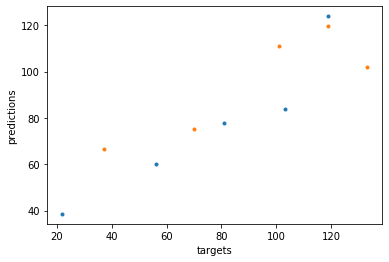

In [129]:
# Plot predictions vs targets
#  In order to get from tensors to numpy arrays that we can plot, we'll have to:
#     - call detach() to return a copy with just the data and not the gradient
#     - call numpy() to return a numpy array, since matplotlib doesn't know how to plot tensors
plt.plot(targets.detach().numpy(),preds.detach().numpy(),'.');
plt.xlabel('targets');
plt.ylabel('predictions');

Not too shabby.

Now we've seen how to implement the main training loop in pytorch. But we did almost everything else manually.

Let's see what it would look like if we did the same thing but now using pytorch's built-in features.

# Linear Regression with Pytorch -- the right way

Instead of doing everything ourselves, we are going to take advantage of the many tools and methods that pytorch has built into it. This includes:
- Dataset and Dataloader objects
- Neural network layers
- Optimizers
- Various predefined loss functions

## Dataset and DataLoader

First we need to import some stuff (we don't *have* to import these into our namespace, since they can be accessed from `torch.`, but it makes the calls shorter):

In [0]:
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader

We can use the `TensorDataset` class to handle our data. One of the things this does is it lets us grab a row from the inputs and target as a tuple: 

In [0]:
# Define dataset
train_ds = TensorDataset(inputs, targets)

In [132]:
# Now we can get rows:
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

Next, we will use pytorch's `DataLoader` which allows can split the data into batches when we train (and even shuffle or resample, if we want). This is useful because in many cases datasets are too big to process completely. Shuffling data when training is almost always a good idea and resampling is useful if our data is imbalanced in some way.

We'll define the `batch_size` when create the DataLoader. This is just the number of rows of the data that we will train over before updating the parameters. 

Note: If we update parameters before passing over the entire dataset, then we refer to each batch as a "mini-batch". This is what happens in **Stochastic Gradient Descent**. We could also process in batches and only update after passing through the entire dataset. In this case, these are called "batches" and we are using **Gradient Descent**. (one reason to batch when doing Gradient Descent is that the full dataset might not fit into memory all at once). You may see the terms "batch" and "mini-batch" used interchangeably (and sometimes incorrectly), but these are the technically correct definitions of the term.

Here we'll set the batch to be the length of the dataset (so that we only update parameters after processing all of the data).

In [0]:
# Define data loader
batch_size = len(train_ds)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [135]:
#We can see how shuffle works by running over this two times
for i in range(0,2):
  for xb,yb in train_dl:
    print(xb,yb)

# Now change the batch size in the prior cell and rerun both to see what's going on
# Just be sure to set it back to 5 and rerun this before continuing

tensor([[ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [102.,  43.,  37.],
        [ 87., 134.,  58.],
        [ 91.,  88.,  64.]]) tensor([[103., 119.],
        [ 56.,  70.],
        [ 22.,  37.],
        [119., 133.],
        [ 81., 101.]])
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 69.,  96.,  70.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.]]) tensor([[ 56.,  70.],
        [ 81., 101.],
        [103., 119.],
        [119., 133.],
        [ 22.,  37.]])


In [136]:
next(iter(train_dl)) # this will return 5 (batch_size) rows of inputs and targets after shuffling. 
# iter() defines an iterator and next() tells python to get the next iteration from it.

[tensor([[102.,  43.,  37.],
         [ 91.,  88.,  64.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.],
         [ 87., 134.,  58.]]), tensor([[ 22.,  37.],
         [ 81., 101.],
         [103., 119.],
         [ 56.,  70.],
         [119., 133.]])]

We'll see why being able to change the order and group the data into different sized batches is important when we talk about the optimizer.

## Use a predefined linear layer -- nn.Linear()

Instead of:
- defining weights and biases tensors manually
- defining the linear function that uses weights nad biases to relate input to ouput via a matrix multiplication
- initializing weights and biases to random values

We can just use a layer that already does all that: ``torch.nn.Linear()``

In [0]:
model = torch.nn.Linear(3,2) # 3 input (features), 2 outputs

## Optimizer

Instead of manually implementing Gradient Descent to adjust weights and biases according to the gradient and some learning rate, we can use one of Pytorch's built-in optimizers.

Here we'll use the optimizer for <font color=blue>Stochastic Gradient Descent (SGD) </font>, but set it so that we're just doing regular <font color=blue>Gradient Descent</font>. The difference between the two is that in SGD, you adjust your weights and biases after running each item (row of data) through the network. It's **stochastic** because the data loader shuffles the data, so the order the data is seen varies from run to run. There is also another version, called <font color=blue>Batch Gradient Descent</font>, that falls somewhere in between the two -- you update parameters after running some batch of the data through the network. In pytorch, all of these versions (plus some variants) are implement with `torch.optim.SGD()`. Have a look at the [documentation](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD).


In [0]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr is the learning rate

## Loss function

Instead of using our manually defined `mse()` function, we'll use a predefined one.

In [0]:
loss_fn = torch.nn.functional.mse_loss

So, for example, we could compute the loss:

In [140]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(7027.2139, grad_fn=<MseLossBackward>)


## Define a fit function

Finally we will define a function to fit our model by putting all of the above pieces together:

In [0]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    model.train() # put the model into training mode (in case it is already in evaluation mode)
    for epoch in range(num_epochs):
        for xb,yb in train_dl: # sample on batch of inputs,targets
            opt.zero_grad() # tell the optimizer to zero the gradient so we start fresh on this batch
            # Generate predictions and calculate loss
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step() # this tells the optimizer to take one step -- it already knows about model parameters and the learning rate as we passed them when we create opt
            
    print('Training loss: ', loss_fn(model(inputs), targets))

## Fit the model

Now we can train the model by running our fit function:

In [142]:
# Train the model for 100 epochs
fit(100, model, loss_fn, opt)

Training loss:  tensor(179.6193, grad_fn=<MseLossBackward>)


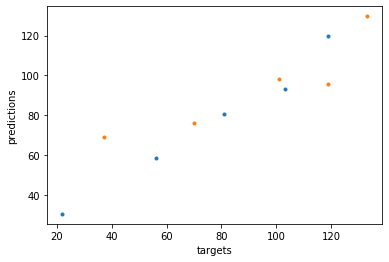

In [143]:
# Get the predictions
preds=model(inputs)

# Plot predictions vs targets
plt.plot(targets.detach().numpy(),preds.detach().numpy(),'.');
plt.xlabel('targets');
plt.ylabel('predictions');

One important thing that we DID NOT DO in the above two examples is that we didn't split the data into training and test sets.  We could have accomplished this using:
```
train_ds,test_ds = torch.utils.data.random_split(full_ds,[len_train, len_test])
```

But we didn't do this because this was just for illustration purposes and the dataset we are using is pretty small.

# Saving and Loading pytorch models

You will want a way to save and (later to) load the models that you have trained. Pytorch has some tools to do this, using `torch.save()` and `torch.load()`.

There are a few approaches:
1. Save the entire model with `torch.save(model,path)` and then later load it using `model = torch.load(path)`
 - This will generate a save file that depends on the actual directory structure used in the specified path -- so you would only be able to load the save file if it was sitting in the same directory (even if you copied it to another system). So this way is not recommended. See the [pytorch docs](https://pytorch.org/tutorials/beginner/saving_loading_models.html) for more info.
2. Save the models state_dictionary only with `torch.save(model.state_dict(),path)`. When you want to load the model, you must then do the following:

  ```python
  model = Model() # make an instance of the model
  model.load_state_dict(torch.load(path))
  ```

3. Save a checkpoint that captures the model's state_dictionary and other state variables, such as the optimizer's state_dictionary, current epoch, and so on. This can be done by passing your own dictionary to `torch.save()` like this:
 
 ```python 
 torch.save({'model_state_dict': model.state_dict(),
            'optimizer_state_dict': opt.state_dict(),
            'epoch': epoch,
            ...
            },
            path)
 ```
 
 Loading the model is then accomplished like this:
 
 ```python
 model = Model() # make an instance of the model
 checkpoint = torch.load(path)
 model.load_state_dict(checkpoint['model_state_dict'])
 ...
 opt.load_state_dict(checkpoint['opt_state_dict'])
 ...
 epoch = checkpoint['epoch']
 ```

The 3rd way is the most bulletproof approach and the most configurable (you can add anything you want to the dictionary that you save -- including some text description). Unfortunately there is no "standard file extension" that is conventionally used, though it is common give torch saves the `.pt` or `.pth` file extension.  

The consequence of this is: As long as you are consistent, you won't have issues saving and loading. But you may have trouble loading models that were saved by others, so be aware of this.

**One thing to note: colab won't save your files if your session disconnects, so you should download them after you save them.**

# Define a simple NN and train it to predict music genre on spotify data

For this exercise, we'll use a dataset from Spotify containing music attributes such as bpm, energy, and danceability. It has 45 songs that belong to either the 'rock' genre or the 'dance pop' genre. For this example, as above, we won't bother to split the data into training and test sets (again, the data here is pretty small).

In [46]:
# Read the data
musicFile = 'https://raw.githubusercontent.com/dylanwalker/BA865/master/datasets/spotify.csv'
musicData = pd.read_csv(musicFile, encoding='latin-1')
musicData.head()

,title,artist,top genre,bpm,energy,danceability,liveness,valence,acousticness,speechiness
0,Highway to Hell,AC/DC,rock,116,91,57,16,42,6,13
1,Back In Black,AC/DC,rock,188,70,31,8,76,1,5
2,Thunderstruck,AC/DC,rock,134,89,50,22,26,0,4
3,Sweet Home Alabama,Lynyrd Skynyrd,rock,98,61,60,9,89,18,3
4,Fortunate Son,Creedence Clearwater Revival,rock,133,66,64,15,66,20,4


The first step is to define the dataset. 

Make a new column in the dataframe called 'genre_class'. Set it to be 0 for 'rock' and 1 for 'dance pop' (these are the only genres in the dataset).

We need to get our pandas data into torch tensors. One way to do this is to first convert them to numpy arrays and then call `torch.from_numpy()` on the numpy arrays. We'll want to set the `dtype=float32` when we call `np.array()` on the pandas columns.

Define the musical attributes ('bpm' through 'speechiness') as a pytorch tensor called `features`.

Define a pytorch tensor called `targets`  based on the column `genre_class`.



In [0]:
# INSERT YOUR CODE HERE

Now create a TensorDataSet from `features` and `targets` called `train_ds`.

Also create a DataLoader called `train_dl` from `train_ds` using `batch_size=90` and `shuffle=True`. 

In [0]:
from torch.utils.data import TensorDataset, DataLoader
# INSERT YOUR CODE HERE

Next, define a data loader with batch_size = 10 and shuffle = True.

In [0]:
# INSERT YOUR CODE HERE

Note that we can see the shapes of tensors drawn from the dataloader with our given batch size:

In [0]:
x1,y1=next(iter(train_dl)) # pull a single x,y from the data loader
print(x1.shape)
print(y1.shape)

If we wanted to pass these through a loss function, we would likely have to alter the shape of the `y`, to something that our loss function can understand. We can do this with a `.view(-1,1)` operation, which will make it a tensor with 90 rows and 1 column (instead of a 1d tensor), like so:

In [0]:
y1.view(-1,1)
print(y1.view(-1,1).shape) # this will output a shape of [90,1]

For our neural network model we'll use a single fully connected layer (`torch.nn.Linear()`), followed by a sigmoid activation function (`torch.nn.Sigmoid()`). 

Note that `torch.nn.Linear()` takes two arguments that specify the size of the input and output. You'll have to figure out what these should be based on the data. Remember that we want to connect all the features to a single output thta is then passed through the activation function. `toch.nn.Sigmoid()` does not need any arguments.

We can create a model object from these two layers by passing them as arguments to `torch.nn.Sequential()`. This will make a neural network that connects the output of each layer to the input of the next.

By using the sigmoid function, the output of the fully connected layers is converted into a value between 0 and 1. If the converted value is larger than 0.5, we will interpret this as the model predicting the genre of a music to be 'dance pop' (since we set `genre_class=1` for 'dance pop'. Otherwise, the model predicts the genre to be 'rock' music.

We'll set the random seed of pytorch manually, using `torch.manual_seed(0)` just to ensure that we are all working on the same shuffled sequence. This step is not needed in general when you train a NN with shuffling, but just included to make sure we're all on the same page.

In [0]:
torch.manual_seed(0)
# model = FILL IN YOUR CODE HERE

Now instantiate an SGD optimizer using `torch.optim.SGD()`. We can use a learning rate of `lr=1e-4`.

For the loss function, we'll use the binary cross entropy loss, `torch.nn.BCELoss()` with the argument `reduction='mean'`. BCELoss is often used in logistic regression.

In [0]:
# optimizer = FILL IN YOUR CODE HERE
# loss_function = FILL IN YOUR CODE HERE

Now write the code for training the model over 1000 epochs. You can look back at my `fit()` function defined above. You don't need to write this as a function, but can instead just write the code directly.

The model will be trained for 1000 epochs (i.e., you need to loop over epochs).

When you call `loss_function`, on the predictions (`pred`) and the targets (`yb`), you will need to adjust the shape of the targets, as explained above.

We can calculate a running_loss for each epoch by setting `running_loss=0` before looping over the items in `train_dl`.  We can add up the contribution from each batch to the running loss by adding a line `running_loss+=loss.item()` after calling `loss.backward()`.

Finally, we may like to print out the loss for some epochs (there are 1000 epochs, so its overkill to print out the loss for each one). Instead we can print out the loss for only certain values of the epoch -- for example when the epoch divided by 100 has a remainder of 99, or `epoch%100==99`. When this occurs, print out the average loss for that epoch, `running_loss/len(train_dl)`. 

You can also try your hand at calculating either the average training accuracy for an epcoh or the "last batch training accuracy" of the model at these particular epochs.

In [0]:
# FILL IN YOUR CODE HERE
n_epochs = 1000
model.train()
for epoch in n_epochs:
  pass # replace this with your code 

Finally, when the model has been fully trained, let's look at a prediction for a particular song. We'll predict the genre of Ariana Grande's "no tears left to cry." This song is classified as 'dance pop' in the Spotify. Here's the music video:

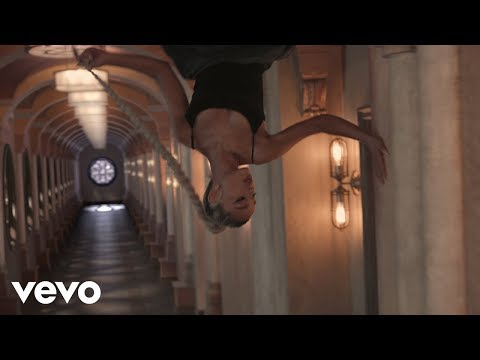

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('ffxKSjUwKdU',width=400,height=300)

This particular song has the features (bpm, energy, danceability, liveness, valence, acousticness, speechiness): [122, 71, 70, 29, 35, 4, 6]

Get the prediction for this particular song by passing the appropriate input into the model to get the output. How do you interpret this output?

In [0]:
# INSERT YOUR CODE HERE